Assignment #10
======

1) Let's Make a Deal
------------------

In [1]:
import random

def dealmaker(choice,swap):                      # Game Function

    prizes = ["Highest","Median", "Lowest"]      # Prize array
    random.shuffle(prizes)                       # 'Randomize' Prize array
    
    if swap == "Y":                                # Swap method
        if prizes[choice] == "Highest":
            return("Uh-Oh, Better Luck Next time.")
        else:
            return("Congratulations! You've won the Big Prize")
    else:                                                         # No swap method
        if prizes[choice - 1] == "Highest":
            return("Congratulations! You've won the Big Prize")
        else:
            return("Uh-Oh, Better Luck Next time.")

In [2]:
win = 0          # Hardcoded for Swap

for i in range(1000):
    if dealmaker(2,"Y") == "Congratulations! You've won the Big Prize":
        win += 1
        
print("The probability of winning by swapping is roughly {} %".format(win/10))

The probability of winning by swapping is roughly 67.2 %


In [3]:
win = 0               # Hardcoded for no Swap

for i in range(1000):
    if dealmaker(2,"N") == "Congratulations! You've won the Big Prize":
        win += 1
        
print("The probability of winning by swapping is roughly {} %".format(win/10))

The probability of winning by swapping is roughly 32.7 %


In [4]:
choice = eval(input("What box would you like? (1-3): "))  # Playable version
swap = input("I've removed the lowest remaining value. Would you like to swap? (Y/N): ")

dealmaker(choice,swap)

What box would you like? (1-3): 2
I've removed the lowest remaining value. Would you like to swap? (Y/N): Y


"Congratulations! You've won the Big Prize"

2) Radioactive Decay
---------------------

In [31]:
from numpy import arange
from random import random


NBi203 = 10000    # Number of atoms 
NPb = 0
NBi209 = 0
NTl = 0

Pbt = 3.3*60   # Half life for Pb in s
Bi203t = 46.0*60    # Half life for Bi in s
Tlt = 2.2*60   # Half life for Tl in s

tmax = 2e4        # Total time period in s
dt = 1        # time step in s

t = arange(0.0,tmax,dt)         # Array of sample times
Pb = []
Bi203 = []
Tl = []                       # Arrays for atoms
Bi209 = []

def prob(tau):                # probability function
    p = 1 - 2**(-dt/tau)
    return(p)

In [32]:
for i in t:                  # loop through time points
    Bi203.append(NBi203)     # Populate arrays w initial populations
    Tl.append(NTl)
    Pb.append(NPb)
    Bi209.append(NBi209)
    
    decay = 0
    for i in range(NPb):       # Loop through each Pb atom to check for decay
        if random() < prob(Pbt):
            decay += 1
    NPb -= decay              # adjust population post decay
    NBi209 += decay
    
    decay = 0
    for i in range(NTl):       # Loop through each Tl atom to check for decay
        if random() < prob(Tlt):
            decay += 1
    NTl -= decay              # adjust population post decay
    NPb += decay
    
    decayPb = 0
    decayTl = 0
    for i in range(NBi203):      # Loop through each Bi203 atom to check for decay
        if random() < prob(Bi203t):
            if random() > .0209:            #choose decay path randomly
                decayPb += 1
            else:
                decayTl += 1
    NBi203 -= (decayPb + decayTl)              # adjust population post decay
    NPb += decayPb
    NTl += decayTl

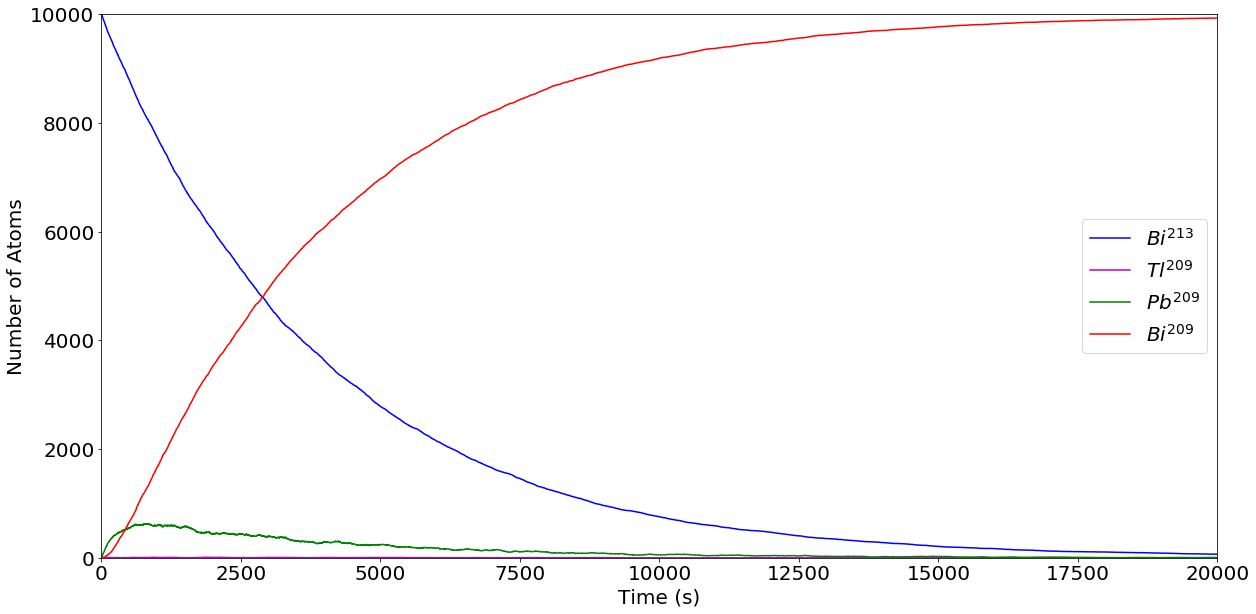

In [51]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
fig.subplots_adjust(hspace=0.0, wspace=0.0)


ax.plot(t,Bi203, c='b', label = "$Bi^{213}$")         # plot Bi203 vs. time
ax.plot(t,Tl, c='m', label = '$Tl^{209}$')                    # plot Tl vs. time
ax.plot(t,Pb, c='g', label = '$Pb^{209}$')                  # plot Pb vs. time
ax.plot(t,Bi209, c='r', label ='$Bi^{209}$')          # plot Bi209 vs. time

ax.set_xlim(0,2e4)
ax.set_ylim(0,1e4)

ax.set_xlabel("Time (s)",size=20)
ax.set_ylabel("Number of Atoms",size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.legend(loc="center right", fontsize = 20 )       # Create legend

plt.savefig("Decay.png")              #save and show plot
plt.show()